# Supervised Machine Learning: Predict Titanic Survival

The RMS Titanic set sail on its maiden voyage in 1912, crossing the Atlantic from Southampton, England to New York City. The ship never completed the voyage, sinking to the bottom of the Atlantic Ocean after hitting an iceberg, bringing down 1,502 of 2,224 passengers onboard.

The goal of this project is to create a Logistic Regression model that predicts which passengers survived the sinking of the Titanic, based on features like age and class and other relevant parameters.

The data we will be using for training our model is provided by Kaggle.

Columns description:

- `PassengerId:` passenger identification number;
- `Survived:` binary code, that denotes whether a passenger survived (1 - "Yes") or not (0 - "No").
- `Pclass:` passenger class: 1 - 1st, 2 - 2nd, 3 - 3rd;
- `Name:` passenger name;
- `Sex:` passenger sex;
- `Age:` passenger age;
- `SibSp:` number of siblings/ spauses aboard;
- `Parch:` number of parants/ children aboard;
- `Ticket:` ticket number;
- `Fare:` passenger fare (£);
- `Cabin:` cabin number;
- `Embarked:` port of embarcation (C- Cherbourg, S- Southampton,Q- Queenstown )


### Exploratory Data Analysis

The file passengers.csv contains the data of 892 passengers onboard the Titanic when it sank that fateful day. Let’s begin by loading the data into a pandas DataFrame named `passengers`, then print it and inspect the columns. 

In [1]:
# Basic imports related to analysis
import pandas as pd
import numpy as np

# Import for visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Imports for ml
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the passenger data
passengers = pd.read_csv('passengers.csv')
passengers.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [2]:
passengers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Let's print unique values of columns that have a low number of variations in their values to see if everything is ok there. 

In [3]:
columns = ['Pclass', 'SibSp', 'Parch', 'Sex', 'Survived', 'Embarked']
for i in range(len(columns)):
    print(columns[i], passengers[columns[i]].unique())

Pclass [3 1 2]
SibSp [1 0 3 4 2 5 8]
Parch [0 1 2 5 3 4 6]
Sex ['male' 'female']
Survived [0 1]
Embarked ['S' 'C' 'Q' nan]


In [4]:
passengers.Ticket.unique()[:20]

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649'], dtype=object)

In [5]:
len(passengers.Ticket.unique())

681

Result: 
- A lot of values are missing in the `Age` column, and we'll need this column for feature engineering, so we are going to deal with during feature engineering stage. 
- Much worse situation with the `Cabin`, most of the data is absent, so we won't be able to use it as a feature.  
- The `Embarked` has some missing values, and we'll check its correlation with survival during feature engineering.
- Situation with `Ticket`s is also complicated because there are `681`  unique tickets out of `981` data points and there is no obvious structure to them, so we'll set them aside for now.

Let's check some statistics for this dataset.

In [6]:
passengers.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
passengers.sort_values('Fare', ascending=False).head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S


In [8]:
passengers.sort_values('Fare', ascending=True).head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S


In [9]:
len(passengers[passengers.Fare == 0])

15

Result: There is an issue with the `Fare`, it appears that 3 passengers paid a lot more than others - about `512£`, and 15 paid `0£` for their tickets. That may affect visualizations and will create a huge bias that "poor people are likely to die" in our model, but right now our goal right now is to create model based on real data with all its inequalities, so let's proceed as it is for now later we will replace `0`s with relevant values not destirbing the current values distribution.

### Feature Engineering

Logistic regression is a supervised machine learning algorithm that predicts the probability, ranging from 0 to 1, of a data point belonging to a specific category, or class. These probabilities can then be used to assign, or classify, observations to the more probable group. As the name of this project suggests, we are going to estimate the chances of survival on Titanic, so our class of determination will be `Survived`. Consequently, our model will predict survival to be `0` meaning would not survive, and `1` - would survive, based on significant parameters or features. To find these features we'll analyse existing parameters to get a sense how well they suit our purposes and what additional tweaks should we make to make them better for our model.  

Let's check correlations between `Survived` and other parameters on a heatmap to find potential features for our model. But before that we need to attend to our `Sex` and `Embarked` columns: to perform any calculations we need numerical values there. So let’s map the text values in the `Sex` and `Embarked` columns to numerical values. 

All values `female` will be replaced with `1` and all values `male` will be replaced with `0`.

In [10]:
# Update sex column to numerical
passengers['Sex_num'] = passengers.Sex.map({'female': 1, 'male': 0})

All values `S` will be replaced with `0`, all values `C` will be replaced with `1` and all values with `Q` will be replaced with `2`.

In [11]:
passengers['Embarked_num'] = passengers.Embarked.map({'S': 1, 'C': 2, 'Q': 3}).convert_dtypes()

<AxesSubplot:title={'center':"Titanic's Passengers Parameters Correlation"}>

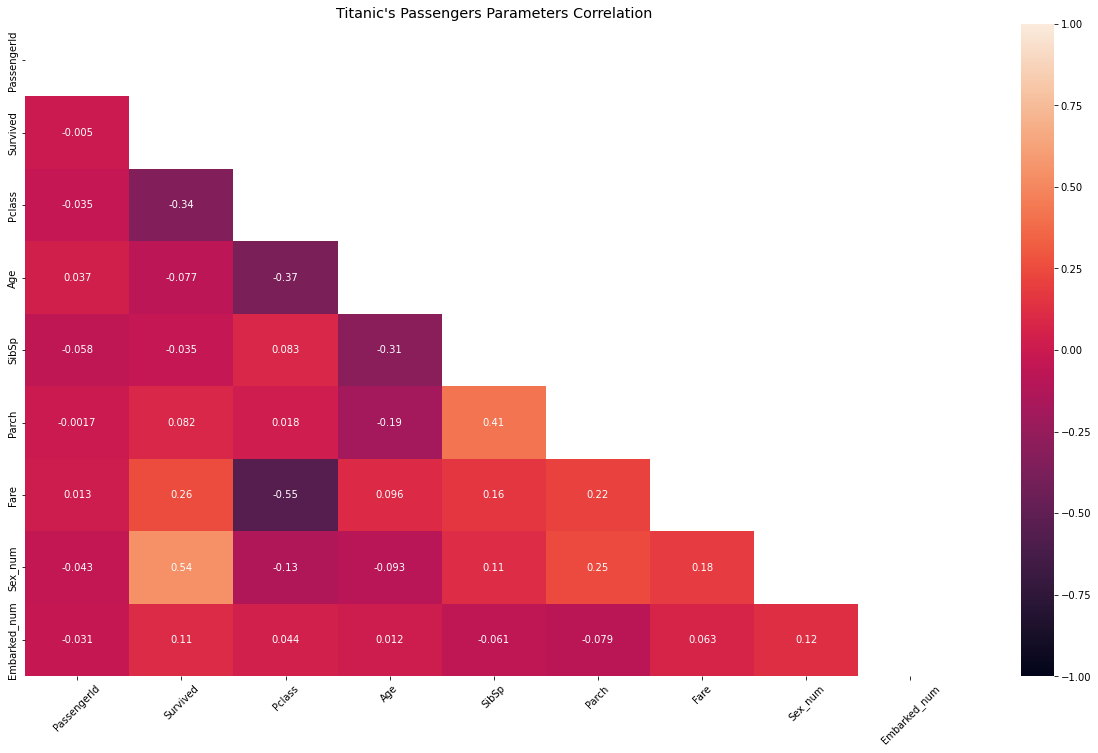

In [12]:
def visualise_heatmap(dataset_corr, corr_objects):
    # Prepare figure
    plt.figure(figsize = (21,12))

    # Draw heatmap as triangle
    mask = np.triu(np.ones_like(dataset_corr, dtype=bool))
    # Add descriptions
    plt.title(corr_objects, fontsize= 'x-large')
    plt.xticks(rotation=45)

    # Plot heatmap
    heatmap = sns.heatmap(dataset_corr, annot=True, vmax=1, vmin=-1, cmap='rocket', mask=mask)
    return heatmap

visualise_heatmap(passengers.corr(), 'Titanic\'s Passengers Parameters Correlation') 

Result: 
- In reality `Age` has no significant correlation with survival, `Sex` on the contrary, has medium positive correlation (`0.54`) with survival. So first our feature will definitely be `Sex`. 
- `Fare` and `Pclass` look promissing as features with positive correlation of `0.26` and negative `-0.34` respectively. So we are going to take them as well. 
- Seems like `Embarked_num` has small positive correlation - `0.11`, so it can be used as a feature too.
- `Age`, `Parch`(number of parents/children on board) and `SibSp` (number of siblings/ spauses aboard) can be used as additional features. 

Now let's see what flaws our features can have and what can we do about it. We'll start with a simple `Fare` histogram.

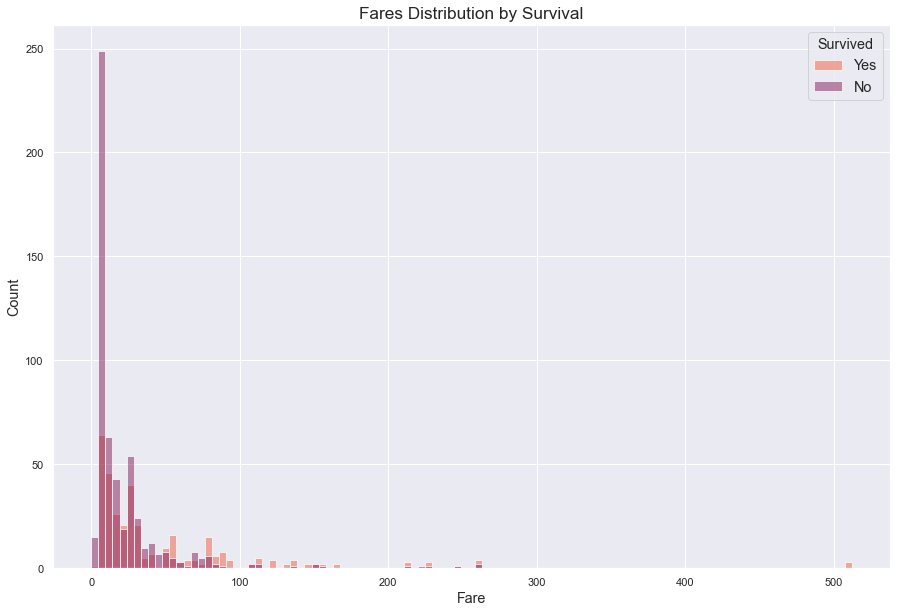

In [13]:
# Set darkgrid for all plots of the project
sns.set(style='darkgrid')

def visualise_hist(dataset, column_names, palette, title, xlabel, ylabel):
    # Prepare figure
    plt.figure(figsize = (15,10))
    # Draw hisplot
    ax = sns.histplot(
        passengers, 
        x=column_names[0], 
        hue=column_names[1], 
        stat="count", 
        legend=False, 
        palette=palette
        )

    # Add descriptions
    ax.set_title(title, fontsize = 'x-large')
    ax.set_xlabel(xlabel, fontsize = 'large')
    ax.set_ylabel(ylabel, fontsize = 'large')

    plt.legend(
        title='Survived', 
        title_fontsize='large', 
        loc='upper right', 
        labels=['Yes', 'No'], 
        fontsize = 'large')
    return plt.show()

visualise_hist(
    passengers, 
    column_names=['Fare', 'Survived'], 
    palette='rocket', 
    title='Fares Distribution by Survival', 
    xlabel='Fare', 
    ylabel='Count')

Result: 
- Histogram is heavily skewed to the right, because of 3 outliers who paid `512£` and some others who also paid very high prices for their tickets. 
- There is also a high peak which tells us that the majority of those who died had low fare tickets. 

Both these factors will create huge bias toward the death of people with low income in our model, but that is the hard truth about "Titanic" history, so we'll not do anything to prevent these bias from happening.

Now we are going to display on several graphs relationships between several variables to find how the number of survivors changes based on such parameters as `Sex`, `Age` and `Fare`. First we'll explore the general numbers of survivors depending on `Sex` parameter on a histogram. 

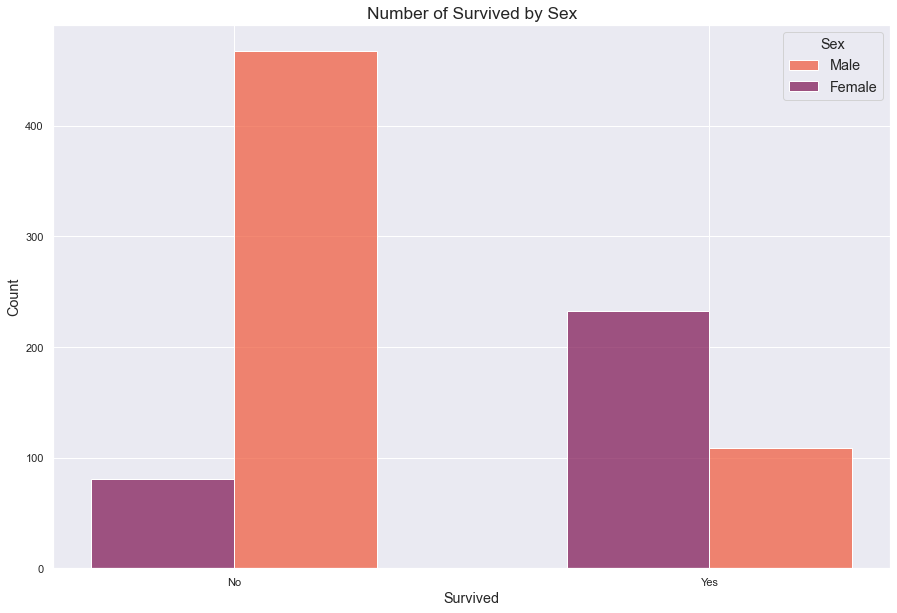

In [14]:
# Create separate column with Survived values in str to correctly draw histplot
passengers['Survived_str'] = passengers.Survived.map({0:'No', 1:'Yes'}).astype(str)

def visualise_hist(dataset, column_names, palette, title, xlabel, ylabel, hue_order, set_xticks, legend_title, legend_labels):
    # Prepare figure
    plt.figure(figsize = (15,10))
    # Draw hisplot
    ax = sns.histplot(
        data=dataset, 
        x=column_names[0], 
        hue=column_names[1],
        hue_order=hue_order, 
        shrink=0.6, 
        multiple='dodge', 
        palette= palette,
        legend=False
        )

    # Add descriptions
    ax.set_title(title, fontsize = 'x-large')
    ax.set_xlabel(xlabel, fontsize = 'large')
    ax.set_ylabel(ylabel, fontsize = 'large')
    ax.set_xticks(set_xticks)

    plt.legend(
        title=legend_title, 
        title_fontsize='large', 
        loc='upper right', 
        labels=legend_labels, 
        fontsize = 'large')

    return plt.show()

visualise_hist(
    passengers, 
    column_names=['Survived_str', 'Sex'], 
    palette='rocket', 
    title='Number of Survived by Sex', 
    xlabel='Survived', 
    ylabel='Count',
    hue_order=['female','male'], 
    set_xticks=[0, 1], 
    legend_title='Sex', 
    legend_labels=['Male', 'Female']
    )


Result: 
- Clearly, most of the people died, among them the majority were males.
- A little more than 200 women and about 100 men survived. 

Let's see what place of embarkation will be able to tell us.

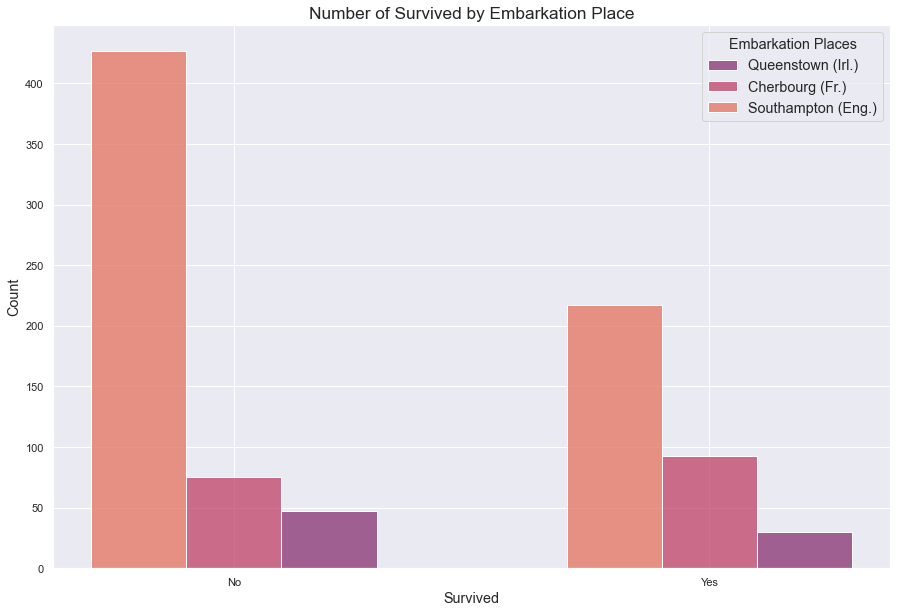

In [15]:
visualise_hist(
    passengers, 
    column_names=['Survived_str', 'Embarked'], 
    palette='flare', 
    title='Number of Survived by Embarkation Place', 
    xlabel='Survived', 
    ylabel='Count',
    hue_order=['S', 'C', 'Q'], 
    set_xticks=[0, 1], 
    legend_title='Embarkation Places', 
    legend_labels=['Queenstown (Irl.)', 'Cherbourg (Fr.)', 'Southampton (Eng.)']
    )

In [16]:
passengers.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

Result: 
- Most people embarked in England, some in France and few in Ireland. 
- More of those who embarked in Ireland died, same goes for those from England, but for those from France it's vice versa.

Now let's see on a box-plot the change in survival of men and women depending on `Age` parameter.

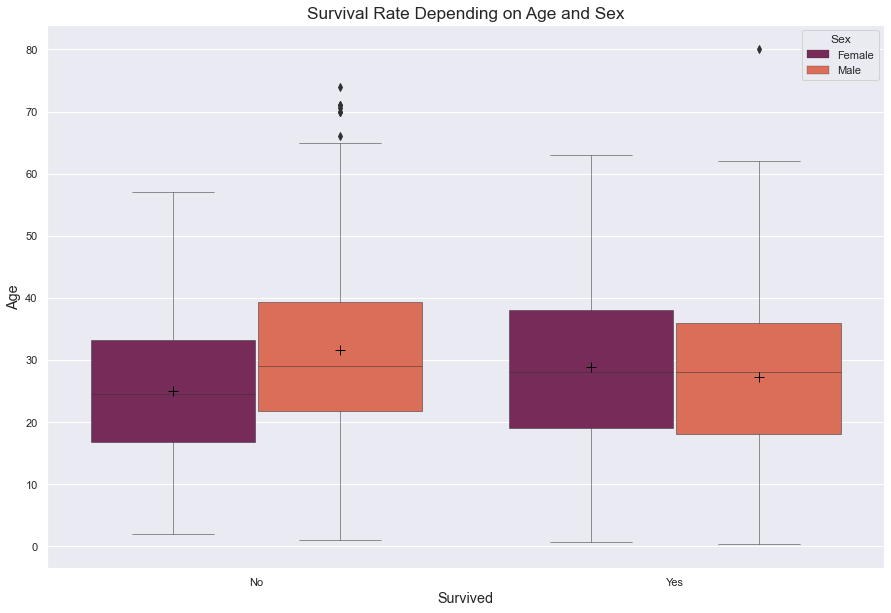

In [17]:
# Draw boxplot
def visualise_boxplot(dataset, column_names, palette, title, xlabel, ylabel):
    plt.figure(figsize = (15,10))
    ax = sns.boxplot(
        data=dataset,
        x= column_names[0], 
        y= column_names[1],
        hue=column_names[2],
        hue_order=[1,0],
        palette=palette, 
        showmeans=True,
        meanprops={"marker": "+",
            "markeredgecolor": "black",
            "markersize": "10"},
        linewidth=0.5)

    # Add descriptions
    ax.set_title(title, fontsize = 'x-large')
    ax.set_xlabel(xlabel, fontsize = 'large')
    ax.set_ylabel(ylabel, fontsize = 'large')
    ax.set_xticklabels(['No', 'Yes'])
    
    ax.legend(title='Sex')
    ax.legend_.texts[0].set_text('Female')
    ax.legend_.texts[1].set_text('Male')

    return plt.show()

visualise_boxplot(
    passengers, 
    column_names=['Survived', 'Age', 'Sex_num'], 
    palette='rocket', 
    title='Survival Rate Depending on Age and Sex', 
    xlabel='Survived', 
    ylabel='Age'
)

In [18]:
passengers.sort_values('Age', ascending=False).head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_num,Embarked_num,Survived_str
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S,0,1,Yes
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S,0,1,No
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C,0,2,No
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C,0,2,No
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q,0,3,No


Result: 
- Among females survived those who are generally older - around `22-38` years. 
- Children clearly weren't major group among survivers. 
- Among males the other way around - survived those who generally younger in a range from `18` to `37` or so, with one outlier who is `80`. 

Now let's check what ratios we'll get if we'll focus on `Fare` and `Sex`.

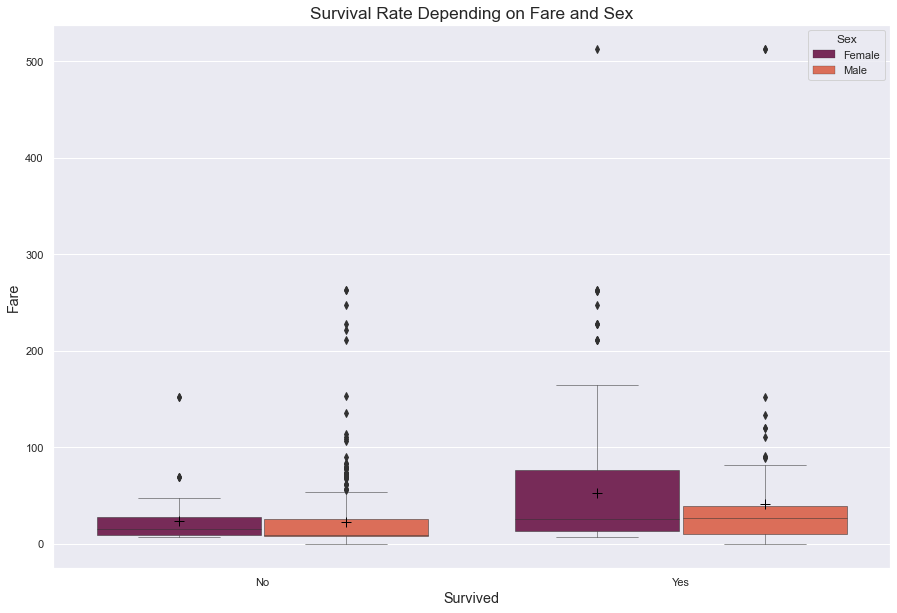

In [19]:
visualise_boxplot(
    passengers, 
    column_names=['Survived', 'Fare', 'Sex_num'], 
    palette='rocket', 
    title='Survival Rate Depending on Fare and Sex', 
    xlabel='Survived', 
    ylabel='Fare'
)

Data is squashed by outliers who had high fare tickets. Let's set a temporary limitation on `Fare` data to be `less than 150` to see data more clearly on this particular plot. 

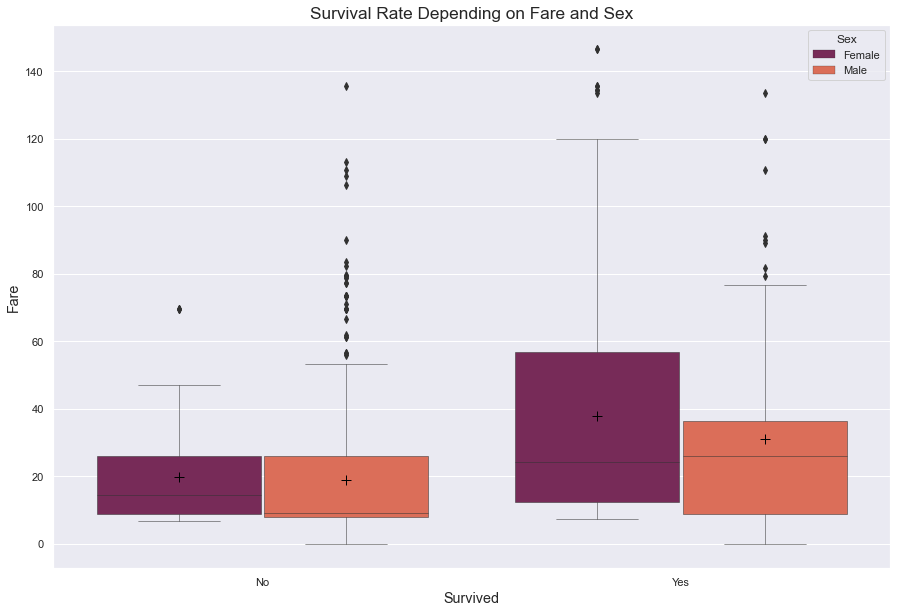

In [20]:
visualise_boxplot(
    passengers, 
    column_names=['Survived', passengers.Fare[passengers.Fare < 150], 'Sex_num'], 
    palette='rocket', 
    title='Survival Rate Depending on Fare and Sex', 
    xlabel='Survived', 
    ylabel='Fare'
)

Result: 
- There is a big gap between median (horizontal line on the box) and mean (`+` sign), which telling us that data is still seriously affected by `Fare` outliers that have high values. 
- Among survivors a lot of females in general, but more of those who managed to pay at least `10£` or more for their tickets.  
- Surprisingly enough there are not only a lot of males and females who had low-priced tickets died, but also some of the males who paid `100£` and more for theirs, what supports the saying "Women and children first", at least to some extent. 

Now we are going to tweak our features to make them suitable for model. Let's start with creating new dataframe features that consists only of features.


In [21]:
passengers_short = passengers[['Survived', 'Sex_num', 'Fare', 'Pclass', 'Embarked_num', 'Age', 'SibSp', 'Parch']].reset_index(drop=True)
passengers_short.head()

,Survived,Sex_num,Fare,Pclass,Embarked_num,Age,SibSp,Parch
0,0,0,7.2500,3,1,22.0,1,0
1,1,1,71.2833,1,2,38.0,1,0
2,1,1,7.9250,3,1,26.0,0,0
3,1,1,53.1000,1,1,35.0,1,0
4,0,0,8.0500,3,1,35.0,0,0


There were a lot of `nan`s in `Age` column, when we last check, so now it's time to deal with it to prepare this column for the model.

In [22]:
passengers_short.Age.unique()[:15]

array([22., 38., 26., 35., nan, 54.,  2., 27., 14.,  4., 58., 20., 39.,
       55., 31.])

There are some `nan`s so let's fill all the empty `Age` values in passengers with the mean age.

In [23]:
# Fill the nan values in the age column
passengers_short.Age.fillna(value=passengers_short.Age.mean().round(2), inplace=True)
passengers_short.Age.unique()[:15]

array([22. , 38. , 26. , 35. , 29.7, 54. ,  2. , 27. , 14. ,  4. , 58. ,
       20. , 39. , 55. , 31. ])

Now we are going to replace absent values in `Embarked_num`, let's see how many there are. 

In [24]:
passengers_short[passengers_short.Embarked_num.isna()]

,Survived,Sex_num,Fare,Pclass,Embarked_num,Age,SibSp,Parch
61,1,1,80.0,1,<NA>,38.0,0,0
829,1,1,80.0,1,<NA>,62.0,0,0


Considering there are only 2 passengers with absent numbers we can replace `nan`s manually. We'll replace `nan`s with `3` (Queenstown), considering this place of embarkation is underrepresented.

In [25]:
passengers_short.Embarked_num.fillna(3, inplace=True)

In [26]:
passengers_short.Fare.sort_values(ascending=True).unique()[:10]

array([0.    , 4.0125, 5.    , 6.2375, 6.4375, 6.45  , 6.4958, 6.75  ,
       6.8583, 6.95  ])

When dealing with `Fare`, first we are going to replace all `0`s with small random `float` values.

In [27]:
rng = np.random.default_rng(123)
rints = (rng.random(size=15) * 10 + 5).round(4)
rints

array([11.8235,  5.5382,  7.2036,  6.8437,  6.7591, 13.1209, 14.2334,
        7.7657, 13.1975, 13.8989, 10.1297,  7.4496, 13.2424,  7.1376,
       12.4147])

In [28]:
for i in range(len(rints)):
    passengers_short.Fare.replace(to_replace = 0.0, value = rints[i], inplace=True)

# Check if any 0s left
len(passengers_short[passengers_short.Fare == 0])

0

We also are going to apply One-Hot encoding to `Sex_num`, `Pclass`, `Embarked_num` to show that there is no inherent order among the values of categorical data. 

In [29]:
passengers_short = pd.get_dummies(data=passengers_short, columns=['Sex_num', 'Pclass', 'Embarked_num'])
passengers_short.head()

,Survived,Fare,Age,SibSp,Parch,Sex_num_0,Sex_num_1,Pclass_1,Pclass_2,Pclass_3,Embarked_num_1,Embarked_num_2,Embarked_num_3
0,0,7.2500,22.0,1,0,1,0,0,0,1,1,0,0
1,1,71.2833,38.0,1,0,0,1,1,0,0,0,1,0
2,1,7.9250,26.0,0,0,0,1,0,0,1,1,0,0
3,1,53.1000,35.0,1,0,0,1,1,0,0,1,0,0
4,0,8.0500,35.0,0,0,1,0,0,0,1,1,0,0


### Select and Split the Data

Now that we have cleaned and prepared our data, let’s select the columns we want to build our model on and store them in a variable named `features`. After that we'll select column `Survived` and store it a variable named `survival`.

In [30]:
features = passengers_short[['Fare', 'Age', 'SibSp', 'Parch', 'Sex_num_0', 'Sex_num_1',
       'Pclass_1', 'Pclass_2', 'Pclass_3', 'Embarked_num_1', 'Embarked_num_2',
       'Embarked_num_3']]
features.head(5)

,Fare,Age,SibSp,Parch,Sex_num_0,Sex_num_1,Pclass_1,Pclass_2,Pclass_3,Embarked_num_1,Embarked_num_2,Embarked_num_3
0,7.2500,22.0,1,0,1,0,0,0,1,1,0,0
1,71.2833,38.0,1,0,0,1,1,0,0,0,1,0
2,7.9250,26.0,0,0,0,1,0,0,1,1,0,0
3,53.1000,35.0,1,0,0,1,1,0,0,1,0,0
4,8.0500,35.0,0,0,1,0,0,0,1,1,0,0


In [31]:
survival = passengers_short[['Survived']]

Now let's split the data into training and test sets. We’ll use the training set to train the model and the test set to evaluate the model.

In [32]:
# Perform train, test, split
train_data, test_data, train_cats, test_cats = train_test_split(features, survival)

### Normalize the Data

We are going to apply z-scaling - scale the feature data, so it has mean = 0 and standard deviation = 1, to remove impact of different scales within it on the model performance, sklearn‘s Logistic Regression implementation uses implies normalization anyway.  

In [78]:
scaler = StandardScaler()
train_scaled = scaler.fit_transform(train_data)
test_scaled = scaler.fit_transform(test_data)

### Create & Evaluate Logistic Regression Model 

Fitting the model will perform gradient descent to find the feature coefficients that minimize the log-loss for the training data.

In [150]:
model = LogisticRegression()
model.fit(train_scaled, train_cats.Survived)

LogisticRegression()

The score function should return the percentage of correct classifications on testing data, or the accuracy.

In [151]:
print('Accuracy:', model.score(test_scaled, test_cats.Survived).round(1)*100, '%')

Accuracy: 80.0 %


Which feature is most important in predicting survival on the sinking of the Titanic? 

In [152]:
list(zip(features.columns[:],model.coef_[0]))

[('Fare', 0.09345302474096318),
 ('Age', -0.5304286864360592),
 ('SibSp', -0.5619618926133361),
 ('Parch', -0.06627342199801103),
 ('Sex_num_0', -0.6529215839426906),
 ('Sex_num_1', 0.6529215839426903),
 ('Pclass_1', 0.5188200996229407),
 ('Pclass_2', 0.07247281006394901),
 ('Pclass_3', -0.5053171825101417),
 ('Embarked_num_1', -0.0962259727200815),
 ('Embarked_num_2', 0.12230608854941363),
 ('Embarked_num_3', -0.017520008601890756)]

Let's put coeficients on a graph to have a better understanding. 

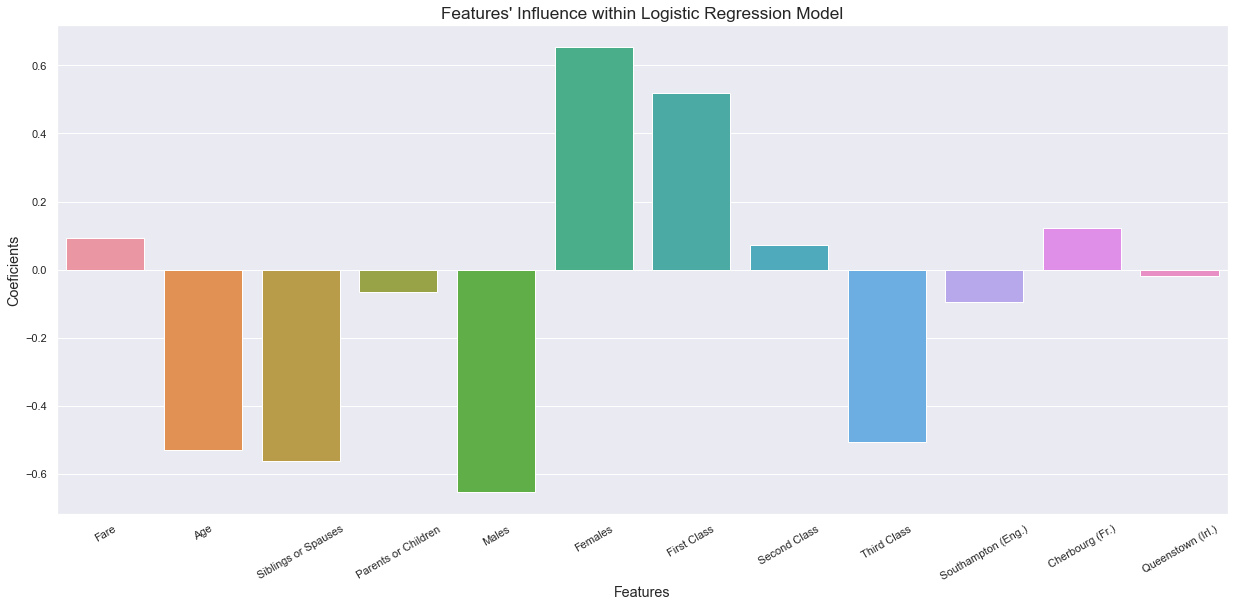

In [153]:
def visualise_barchart(feature_lst, values):
    # Prepare grid
    plt.figure(figsize = (21,9))
    
    # Draw barplot
    ax = sns.barplot(x = feature_lst, y = values)

    # Add descriptions
    plt.title('Features\' Influence within Logistic Regression Model', fontsize='x-large')
    plt.xlabel('Features', fontsize='large')
    plt.ylabel('Coeficients', fontsize='large')
    ax.set_xticklabels(['Fare', 'Age', 'Siblings or Spauses', 'Parents or Children', 'Males', 'Females', 'First Class',
       'Second Class', 'Third Class', 'Southampton (Eng.)', 'Cherbourg (Fr.)', 'Queenstown (Irl.)'], rotation=30)

    
    return plt.show()

visualise_barchart(features.columns[:], model.coef_[0] )